In [0]:
import gym

In [0]:
env = gym.make('FrozenLake-v0')

In [3]:
print(env.observation_space.n)   # get number of states
print(env.action_space.n)   # get number of actions

16
4


In [4]:
env.reset()

0

In [0]:
action = env.action_space.sample() # get a random action

In [0]:
new_state, reward, done, info = env.step(action)  # take action, notice it returns information about the action

In [7]:
env.render()   # render the GUI for the enviornment 

  (Down)
SFFF
FHFH
FFFH
HFFG


#### FROZEN LAKE ENVIRONMENT

In [0]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [9]:
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values 
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

### Constants

In [0]:
EPISODES = 2000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

### Picking an action

In [0]:
epsilon = 0.9  # start with a 90% chance of picking a random action

# code to pick action
if np.random.uniform(0, 1) < epsilon:  # we will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample()  # take random action
else:
    action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values

### Updating Actions

In [0]:
###Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

### Putting It Together

In [0]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9


In [15]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()  
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[4.25529808e-01 2.78093587e-02 2.88660666e-02 2.85516987e-02]
 [1.04379335e-02 1.11783624e-02 4.43468608e-05 3.43163145e-01]
 [1.70463167e-01 9.45241468e-03 3.63112336e-03 1.02765255e-02]
 [2.65416378e-03 2.08077619e-03 8.43155874e-03 1.09900642e-02]
 [5.11805767e-01 7.35204256e-03 2.24102210e-02 7.65583825e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.95798020e-02 5.35822874e-05 3.47860960e-05 2.15170828e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.82472568e-03 1.62843804e-02 1.44616556e-02 7.58538127e-01]
 [1.70001943e-02 8.79754803e-01 2.34885756e-03 1.79637552e-02]
 [1.57984238e-01 3.49033147e-05 1.43423168e-03 3.69178682e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.57911337e-03 3.12573949e-02 8.20459158e-01 1.44912425e-02]
 [9.69632574e-02 9.83561337e-01 1.12729543e-01 5.69205633e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

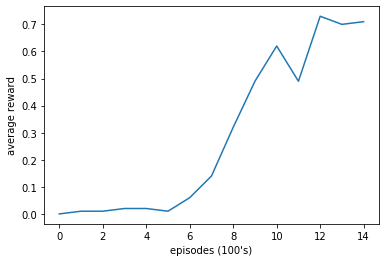

In [16]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()